<a href="https://colab.research.google.com/github/AlinaHerrera/Evidencia/blob/main/Evidencia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Predicción del rendimiento de los estudiantes***


***Organismo que lo generó:***



Fue generado por Kiattisak Rattanaporn en Kaggle; plataforma gratuita que pose a disposición de los usuarios una serie de problemas para solucionar con temáticas como la ciencia de datos, el análisis predictivo y machine learning.

***Enlace de Internet y hoja de cálculo junto con su informe correspondiente.***




Este conjunto de datos se puede descargar en línea desde el sitio web del Kaggle: https://www.kaggle.com/datasets/rkiattisak/student-performance-in-mathematics?resource=download. El conjunto de datos está disponible en formato CSV y se puede acceder a él a través de una descarga directa.

***Descripción de la Base de Datos***



El conjunto de datos "Student Performance in Mathematics" contiene información sobre el desempeño de estudiantes en matemáticas, lectura y escritura incluyendo variables como género, edad, nivel educativo de los padres, etnía, y preparación para el examen, notas de matemáticas, lectura y escritura. Los datos se recopilaron de tres escuelas secundarias en Estados Unidos.

***¿Qué datos contiene?***


- **Gender:** Variable cualitativa. Define el género del estudiante *(male/female)*
- **Race/ethnicity:** Variable cualitativa. Define el origen racial o étnico del estudiante *(Asian, African-American, Hispanic, etc.)*
- **Parent level of education:** Variable cualitativa. Define el nivel más alto de educación alcanzado por los padres o tutores del estudiante.
- **Lunch:** Variable cualitativa. Define si el estudiante recibe almuerzo gratis o a precio reducido *(yes/no)*
- **Test preparation course:** Variable cualitativa. Define sí el estudiante completó un curso de preparación para exámenes *(yes/no)*
- **Math score:** Variable númerica. Define el puntaje del estudiante en una prueba estandarizada de matemáticas
- **Reading score:** Variable númerica. Define el puntaje del estudiante en una prueba de lectura estandarizada
- **Writing score:** Variable númerica. Define el puntaje del estudiante en una prueba de escritura estandarizada




***¿Qué identificador no tiene claro su significado? ¿Cómo podrías investigarlo?***

Todos los identificadores tienen claro su significado. Si se encuentra un identificador sin significado claro, se podría revisar la documentación del conjunto de datos y buscar información adicional sobre la codificación utilizada en este campo específico o buscando información adicional en línea.

***¿Cuáles son algunas de las preguntas podrías responder con estos datos?***

1. ¿Existe alguna diferencia en el desempeño que tuvieron los estudiantes en la materia de matemáticas respecto al genero?
2. ¿Cuál es el porcentaje de grado de escolaridad que alcanzaron los padres de familia?
3. ¿Existe alguna correlación en la etnía de los estudiantes y sus notas de matemáticas?
4. ¿Los alumnos que se prepararon obtuvieron mejores notas?
5. ¿Cuál es la materia más destacada en calificaciones?
6. ¿En qué materias obtienen mejores calificaciones las estudiantes en comparación con los estudiantes masculinos?
7. ¿Las notas están relacionadas con el nivel de escolaridad de los padres?








In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/AlinaHerrera/Visualizaci-n-de-Datos/main/exams.csv')
df.head

In [3]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [4]:
data = pd.read_csv("https://raw.githubusercontent.com/AlinaHerrera/Visualizaci-n-de-Datos/main/exams.csv")

*Pregunta 1.*

### **¿Existe alguna diferencia en el desempeño que tuvieron los estudiantes en la materia de matemáticas respecto al genero?**


In [5]:
plot_order =[10,20,30,40,50,60,70,80,90,100];

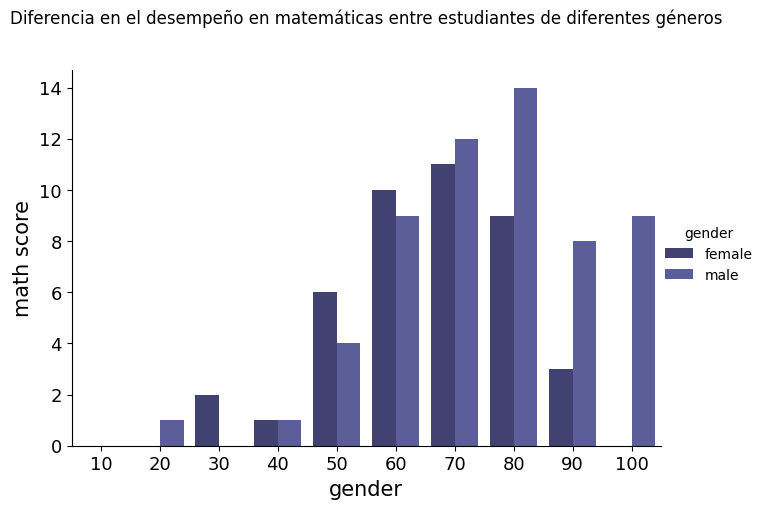

In [6]:
# Crear un gráfico de barras categórico utilizando Seaborn
g = sns.catplot(x="math score", # Columna de los datos para el eje x
            kind="count", # Tipo de gráfico
            palette="tab20b", # Paleta de colores
            hue = 'gender', # Columna de los datos para agregar una dimensión adicional con diferentes colores
            data= data, # Conjunto de datos utilizado
            #index=['<=50','50-60','60-80', '80-100'] # Opcional, establecer el orden de los valores en el eje x
                height=10, # Altura de la figura
                aspect=1.5, # Relación de aspecto de la figura
                order = plot_order, # Orden de los valores en el eje x
)
# Establecer el tamaño de la figura y ajustar el espacio entre los subgráficos
g.fig.set_size_inches(7.2, 5)
g.fig.subplots_adjust(top=0.81, right=0.86)

# Obtener el objeto de eje del gráfico para personalización adicional
ax = g.facet_axis(0, 0)
ax = g.facet_axis(0, 0)

# Establecer la etiqueta del eje x e y con el tamaño de la fuente correspondiente    
plt.xlabel('gender',fontsize=15)
plt.ylabel('math score',fontsize=15)

# Establecer el tamaño de la fuente de las etiquetas de los ejes
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

# Establecer el título del gráfico con la posición del mismo
plt.title('Diferencia en el desempeño en matemáticas entre estudiantes de diferentes géneros', y =1.1)

# Guardar la figura como un archivo PNG
plt.savefig('gender.png')

# Mostrar el gráfico en una ventana emergente
plt.show()

## ***Conclusión***

Si, la gráfica muestra una diferencia en el desempeño en matemáticas entre estudiantes de diferentes géneros. 
Los datos indican que los hombres tienen un mejor desempeño en la materia de matemáticas, entonces esto sugiere que hay una brecha de género en el desempeño matemático en la población estudiada. 

Es importante reconocer que esto puede ser resultado de múltiples factores, incluyendo diferencias culturales, sociales y educativas, y no necesariamente una diferencia biológica innata entre hombres y mujeres. 


*Pregunta 2.*

### **¿Cuál es el porcentaje de grado de escolaridad que alcanzaron los padres de familia?**

In [7]:
# Crear una copia del dataframe original
dFast = df.copy()

In [8]:
df_grouped = dFast.groupby(['parental level of education']).count()
df_grouped

,gender,race/ethnicity,lunch,test preparation course,math score,reading score,writing score
parental level of education,,,,,,,
associate's degree,204,204,204,204,204,204,204
bachelor's degree,105,105,105,105,105,105,105
high school,215,215,215,215,215,215,215
master's degree,75,75,75,75,75,75,75
some college,224,224,224,224,224,224,224
some high school,177,177,177,177,177,177,177


In [9]:
df_grouped.index

Index(['associate's degree', 'bachelor's degree', 'high school',
       'master's degree', 'some college', 'some high school'],
      dtype='object', name='parental level of education')

In [10]:
fig = px.sunburst(data,
                  path = ['parental level of education'],
                  #values = 'Price',
                  title = 'Porcentaje de grado de escolaridad que alcanzaron los padres de familia')
fig.update_traces(textinfo = 'label+percent entry')
fig.show()

## ***Conclusión***

En la gráfica de pastel, se puede apreciar que el orden descendente de los porcentajes de padres de familia que han completado sus estudios es el siguiente: 
1. Alguna universidad
2. Escuela secundaria
3. Título de asociado
4. Alguna escuela secundaria
5. Licenciatura 
6. Maestría 

Además, se puede observar que los porcentajes de padres de familia que han completado sus estudios hasta el nivel de Alguna universidad y escuela secundaria son similares, lo que indica que una gran parte de los padres de familia han finalizado sus estudios en alguno de estos niveles.






*Pregunta 3.*

### **¿Existe alguna correlación en la etnía de los estudiantes y sus notas de matemáticas?**

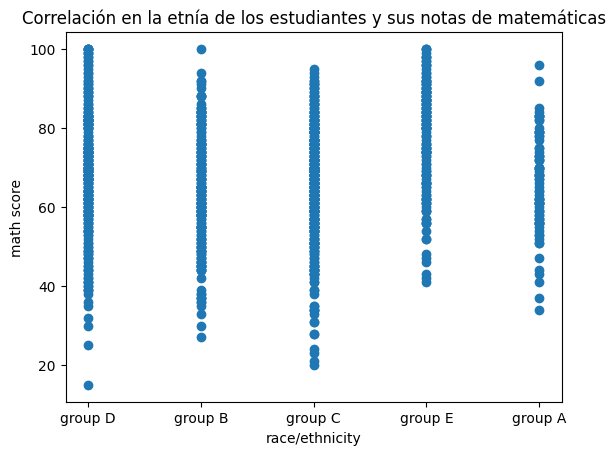

In [11]:
# Crear un gráfico de dispersión con Matplotlib
plt.scatter(data['race/ethnicity'], data['math score'])

# Añadir etiquetas de eje y título
plt.xlabel('race/ethnicity')
plt.ylabel('math score')
plt.title('Correlación en la etnía de los estudiantes y sus notas de matemáticas')

# Mostrar el gráfico
plt.show()

## ***Conclusión***

El gráfico muestra los valores individuales para 5 grupos diferentes, cada punto representa una observación en los datos. La gráfica es útil para comparar visualmente la distribución de todos los grupos de datos. En este caso, se puede ver que el grupo D y el grupo E tiene una distribución más dispersa que los otros grupos, y con observaciones en el 100, lo que significa que los estudiantes de grupo B y E obtuvieron notas más altas. 

*Pregunta 4.*

### **¿Los alumnos que se prepararon obtuvieron mejores notas?**

In [12]:
#función útil para resumir grandes cantidades de datos y mostrarlos de una forma más legible y organizada.

pd.pivot_table(df,
               index = 'test preparation course'
)

<ipython-input-12-9fc80cd78f56>:3: FutureWarning:

pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.



,math score,reading score,writing score
test preparation course,,,
completed,70.334302,74.726744,75.808140
none,66.486280,68.103659,65.643293


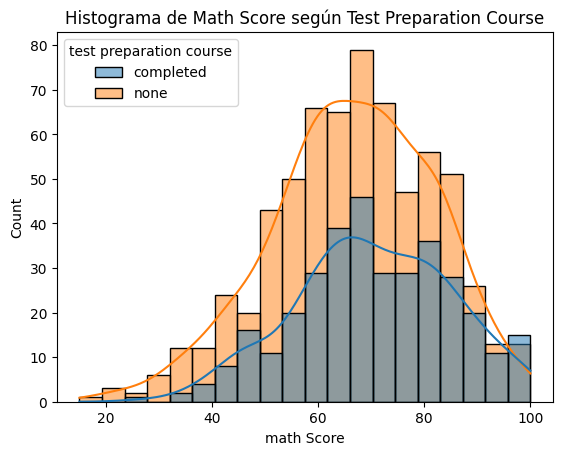

In [13]:
sns.histplot(data=df, x='math score', hue='test preparation course', kde=True)
# data=df: datos provienen del DataFrame "df"
# x='math score': variable que se graficará en el eje x 
# hue='test preparation course': diferenciará el histograma según los valores de la variable "test preparation course"
# kde=True: indica que se graficará una estimación de densidad de kernel

plt.xlabel('math Score')
plt.ylabel('Count')
plt.title('Histograma de Math Score según Test Preparation Course')

# plt.xlabel, plt.ylabel, plt.title: definen las etiquetas y título de los ejes y el título del gráfico
# plt.show: muestra el gráfico

plt.show()

## ***Conclusión***

Se concluyé que los estudiantes que tomaron el curso de preparación obtuvieron mejores notas en las tres materias (mathematics, reading y writing) en comparación con aquellos que no tomaron el curso.

En el gráfico, se puede observar claramente que la media de las calificaciones de los estudiantes que tomaron el curso de preparación es mayor que la de los estudiantes que no lo tomaron en las tres materias evaluadas. Además, la distribución de las calificaciones para los estudiantes que tomaron el curso es más estrecha, lo que indica una mayor consistencia en los resultados.





*Pregunta 5.*

### **¿En qué materias obtienen mejores calificaciones las estudiantes en comparación con los estudiantes masculinos?**


In [ ]:
sns.boxplot(data=df.loc[:, 
                        ["math score", "writing score", "reading score"]
                       ]
           )
plt.xticks(fontsize=10,
           rotation=20
          )
plt.show()

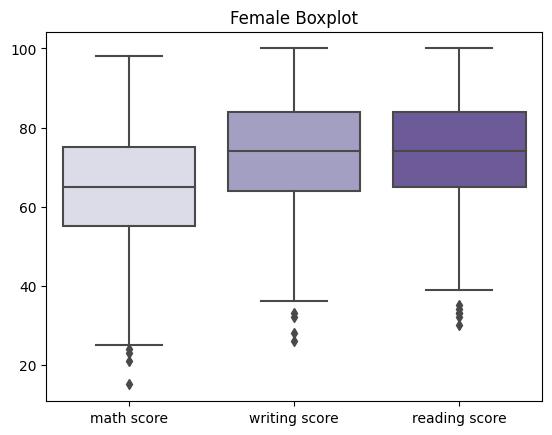

In [15]:
# Female Boxplot
sns.boxplot(data=df.loc[df['gender'] == 'female', 
                        ["math score", "writing score", "reading score"]
                       ],
            palette='Purples'
           )
plt.title('Female Boxplot')
plt.show()

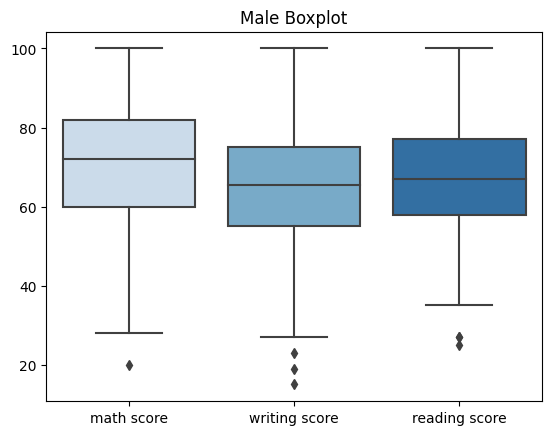

In [16]:
# Male Boxplot
sns.boxplot(data=df.loc[df['gender'] == 'male', 
                        ["math score", "writing score", "reading score"]
                       ],
             palette='Blues'
           )
plt.title('Male Boxplot')
plt.show()

## ***Conclusión***

Se presenta un gráfico de caja que compara las calificaciones de tres materias diferentes. Cada caja representa la distribución de las calificaciones de los estudiantes en cada materia. Se puede observar que las estudiantes obtuvieron significativamente mejores calificaciones en las materias de reading y writing en comparación con los varones. Incluso se observa que en el gráfico de Female hay notablemente más puntos atípicos, los cuales son datos que están muy alejados de otros valores y afectan fuertemente los resultados.






*Pregunta 6.*

### **¿Cuál es la calificación de una estudiante de etnía del grupo D?**

*Regresión Lineal*

In [17]:
df.isnull().any()

gender                         False
race/ethnicity                 False
parental level of education    False
lunch                          False
test preparation course        False
math score                     False
reading score                  False
writing score                  False
dtype: bool

In [18]:
favs = ['gender', 'parental level of education', 'math score']
ndf = df[favs]
ndf.isnull().any()

gender                         False
parental level of education    False
math score                     False
dtype: bool

In [19]:
ndf = ndf.dropna()
ndf.isnull().any()

gender                         False
parental level of education    False
math score                     False
dtype: bool

In [20]:
from sklearn import linear_model 
import statsmodels.api as sm 

In [21]:
X = df.loc[:, ['gender', 'race/ethnicity', 'parental level of education']]
y = df['math score']

In [22]:
X_encoded = pd.get_dummies(X, drop_first=True)

In [23]:
model = sm.OLS(y, X_encoded)

In [24]:
# Ajustar el modelo a los datos
result = model.fit()

# Obtener un resumen de los resultados del modelo
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:             math score   R-squared (uncentered):                   0.906
Model:                            OLS   Adj. R-squared (uncentered):              0.905
Method:                 Least Squares   F-statistic:                              952.4
Date:                Fri, 05 May 2023   Prob (F-statistic):                        0.00
Time:                        15:33:50   Log-Likelihood:                         -4478.9
No. Observations:                1000   AIC:                                      8978.
Df Residuals:                     990   BIC:                                      9027.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------

In [25]:
# Predecir la calificación de una female con race/ethnicity grupo D
# La variable race/ethnicity se codifica como variables dummy, por lo que se deben incluir todas las categorías excepto la de referencia
# En este caso, la categoría de referencia es 'race/ethnicity_group A'
female_group_D = pd.DataFrame({'gender_female': [1], 'race/ethnicity_group B': [0], 'race/ethnicity_group C': [0], 'race/ethnicity_group D': [1], 'race/ethnicity_group E': [0], 'parental level of education_bachelor\'s degree': [0], 'parental level of education_high school': [0], 'parental level of education_master\'s degree': [0], 'parental level of education_some college': [0], 'parental level of education_some high school': [0]})
predicted_score = result.predict(female_group_D)
print("La calificación predicha para una female con race/ethnicity grupo D es:", predicted_score[0])

La calificación predicha para una female con race/ethnicity grupo D es: 64.15139275503758


## ***Conclusión***

Al utilizar un modelo de regresión lineal para predecir la nota en matemáticas a partir de las variables 'gender' y 'race/ethnicity', se encontró que la calificación esperada para una estudiante de género femenino con grupo étnico D es de 64.15. 

Sin embargo, es importante tener en cuenta que esta es una estimación general basada en el modelo y que la calificación real de una estudiante específica puede variar debido a factores no considerados en el modelo.

*Pregunta 7.*

### **¿Las notas están relacionadas con el nivel de escolaridad de los padres?**

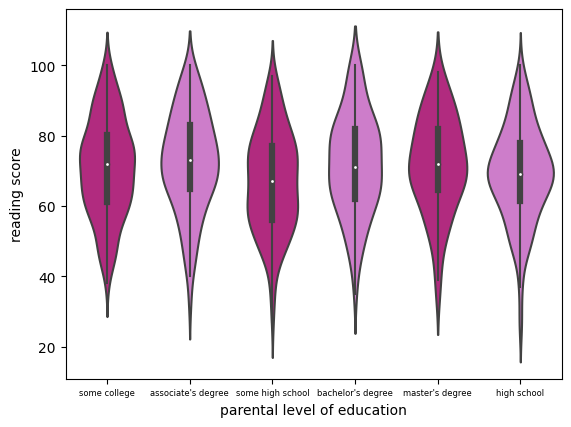

In [26]:
sns.violinplot(x = "parental level of education", 
               y = "reading score", 
               data=df,
               palette=["#C71585", "#DA70D6"]
              );
plt.xticks(fontsize=6)
plt.yticks(fontsize=10)

plt.show()

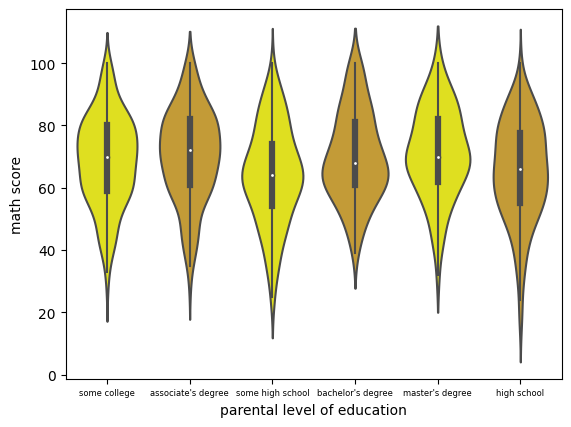

In [27]:
sns.violinplot(x = "parental level of education", 
               y = "math score", 
               data=df,
               palette=["#FFFF00", "#DAA520"]
              );
plt.xticks(fontsize=6)
plt.yticks(fontsize=10)

plt.show()

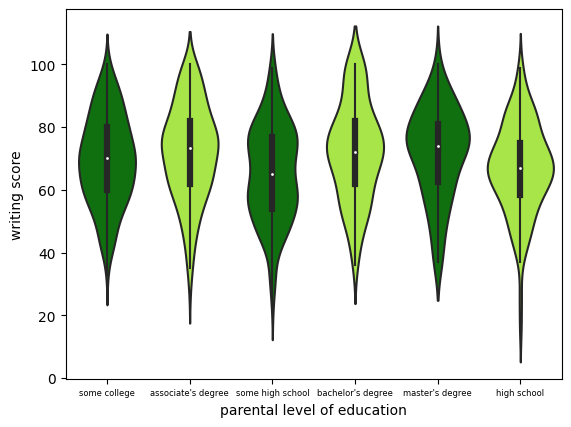

In [28]:
sns.violinplot(x = "parental level of education", 
               y = "writing score", 
               data=df,
               palette=["#008000", "#ADFF2F"]
              );
plt.xticks(fontsize=6)
plt.yticks(fontsize=10)

plt.show()

## ***Conclusión***

Cada violín representa una categoría de la variable categórica, y su forma muestra la distribución de la variable numérica para esa categoría. 
La parte más ancha del violín representa la región de mayor densidad de los datos, y la parte más estrecha representa la región de menor densidad. El punto negro en el centro del violín indica la mediana de los datos para esa categoría.

En los gráficos se observa que la mediana se mantiene igual en todos los grupos por materia, a simple vista se puede observar que los estudiantes con padres con estudios "some high school" son los que se mantienen con notas más bajas, mientras que los estudiantes con padres con estuidos hasta degree son los que tienen las mejores notas. 


***Stakeholders***

- Instituciones educativas. 
- Organizaciones gubernamentales encargadas de la educación. 
- Padres de familia. 
- Investigadores en el campo de la educación. 

## ***Conclusión Final***

Para mejorar el desempeño en las diferentes materias de los estudiantes fueron analizados los factores que tienen mayor influencia en el desempeño de los estudiantes y proponer estrategias para abordarlos.

Por lo tanto, se concluyé que, el factor que tiene influencia en el desempeño de los estudiantes es el curso de preparación tiene un impacto positivo en el rendimiento de los estudiantes en las tres materias evaluadas. Por lo tanto, se podría recomendar a los estudiantes que deseen mejorar su desempeño en estas áreas que consideren tomar un curso de preparación antes de realizar las evaluaciones correspondientes.